# Homework 4: Analyzing Rates of Sea Level Rise
In this homework, you'll investigate sea level change using data from the ECCO state estimate. You'll look at spatial differences over the past few decades and then compare how sea level on the California coast compares to the global mean.

Begin by importing the modules you'll need for this notebook:

In [183]:
# import packages here
from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as ccm
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

## Part 1: Download Sea Surface Height Data
To begin this exercise, download all of the available sea surface height data (1992-2017) from the ECCO Version 4 Release 4 output. There are several different variables for sea surface height pertaining to different components and corrections. In this homework, we'll use the `SSHDYN` variable which is equivalent to what satellites would measure from space.

To obtain the data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes.

In [184]:
# define the path to the folder where the SSH data has been download on your machine
data_path = Path("/home/jon/sjsu/cs185c_fall2024/data")
sshdyn_path = data_path / "ECCO" / "Version4" / "Release4" / "interp_monthly" / "SSHDYN"
print(sshdyn_path)

/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN


## Part 2: Plot Total Sea Level Rise 1992-2017
As a first look into how sea level has changed in the past several decades, we'll look at the differences between two time periods at the beginning and end of the available model output: January 1992 and January 2017. It is important to use the same month because variations in sea level also have a seasonal cycle (as we'll see below). Begin by reading in the data:

In [185]:
# Read in the January 1992 longitude, latitude, and SSHDYN data
jan1992_path = sshdyn_path / "SSHDYN_1992_01.nc"
jan1992_ds = xr.open_dataset(jan1992_path)

print(jan1992_ds.coords)
print(jan1992_ds.dims)

Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 1992-01-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
FrozenMappingWarningOnValuesAccess({'i': 720, 'j': 360, 'time': 1, 'nv': 2})


In [186]:
jan1992_lon = np.asarray(jan1992_ds["longitude"][:])
jan1992_lat = np.asarray(jan1992_ds["latitude"][:])
jan1992_sshdyn = np.asarray(jan1992_ds["SSHDYN"][:])
jan1992_ds.close()

# Select the first timestep
jan1992_sshdyn = jan1992_sshdyn[0, :, :]

print(f"Number of Dimensions: {jan1992_sshdyn.ndim}")
print(f"Shape: {jan1992_sshdyn.shape}")

Number of Dimensions: 2
Shape: (360, 720)


In [187]:
# Read in the January 2017 longitude, latitude, and SSHDYN data
jan2017_path = sshdyn_path / "SSHDYN_2017_01.nc"
jan2017_ds = xr.open_dataset(jan2017_path)
print(jan2017_ds.coords)
print(jan2017_ds.dims)

Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2017-01-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
FrozenMappingWarningOnValuesAccess({'i': 720, 'j': 360, 'time': 1, 'nv': 2})


In [188]:
jan2017_lon = np.asarray(jan2017_ds["longitude"][:])
jan2017_lat = np.asarray(jan2017_ds["latitude"][:])
jan2017_sshdyn = np.asarray(jan2017_ds["SSHDYN"][:])
jan2017_ds.close()

# Select the first timestep
jan2017_sshdyn = jan2017_sshdyn[0, :, :]

print(f"Number of Dimensions: {jan2017_sshdyn.ndim}")
print(f"Shape: {jan2017_sshdyn.shape}")

Number of Dimensions: 2
Shape: (360, 720)


Now, make a plot of the difference between January 2017 and January 1992. Be sure to add a colorbar with a divergent colormaps and set the color bounds to be equal in the positive and negative directions.

In [189]:
# Compute different
jan2017_jan1992_diff = jan2017_sshdyn - jan1992_sshdyn
print(jan2017_jan1992_diff)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.06353092 0.06353092 0.06353092 ... 0.06353092 0.06353092 0.06353092]
 [0.06323484 0.06323484 0.06323484 ... 0.06323484 0.06323484 0.06323484]
 [0.06498262 0.06498262 0.06498262 ... 0.06498262 0.06498262 0.06498262]]


In [190]:
# Determine units
print(jan1992_ds.values())

ValuesView(<xarray.Dataset> Size: 2MB
Dimensions:    (i: 720, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 1992-01-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    SSHDYN     (time, j, i) float64 2MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           1
    geospatial_vertical

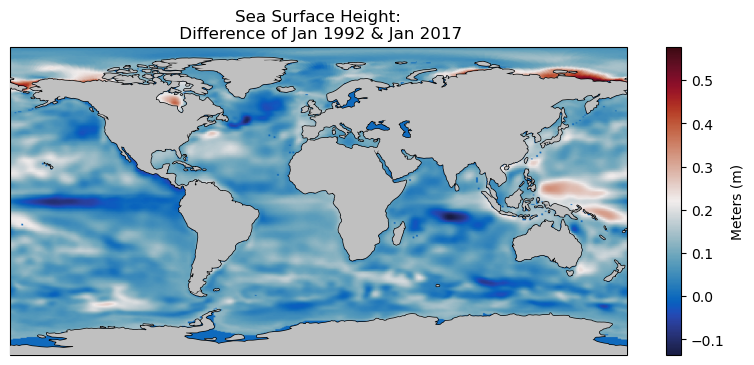

In [191]:
# make a plot of the differences between 2017 and 1992
plt.figure(figsize=(10, 4))

ax = plt.axes(projection=ccrs.PlateCarree())

plt.pcolormesh(
    jan2017_lon,
    jan2017_lat,
    jan2017_jan1992_diff,
    cmap=ccm.balance,
    transform=ccrs.PlateCarree(),
    shading="gouraud",
)
plt.colorbar(orientation="vertical", label="Meters (m)")

# add coastlines
ax.add_feature(cfeature.LAND, zorder=99, facecolor="silver")
ax.coastlines()

# format the axes
plt.title("Sea Surface Height:\n Difference of Jan 1992 & Jan 2017")
plt.show()

### Questions:
Where are the largest increases in sea level observed between these two time periods? Are there any locations on the globe where sea level has fallen? If so, where?

Answer:

The largest observed sea level increases are indicated, based on the color bar, by dark red.  The bodies of water along the northeastern border Russia have the dark red:

- Laptev Sea
- East Siberian Sea
- Chukchi Sea.

Locations where sea level has fallen would be colored dark blue:

- South of Hawaii, along the equator is colored dark blue where the island of Kiribati resides.
- East of the Canadian province, Newfoundland and Labrador, on the northern part of the Atlantic Ocean is colored dark blue.
- Last observed area where sea level has fallen is South of Sri Lanka and below the equator is what could be perceived as the center of the Indian Ocean.  

## Part 3: Create a Timeseries of Sea Surface Height in California
Next, we'll make a timeseries of sea surface height at a point off the California coast near San José. A close location in the model is at 37$^{\circ}$N, 122$^{\circ}$W. Begin by finding the closest row and column in the model grid to this longitude and latitude.

In [192]:
# define the latitude and longitude
lon = -122
lat = 37

# find the row and column closest to the location of the point off the CA coast
# note that you have already read in the longitude and latitude if the grid to make the plot above
lon_index = np.argmin(abs(jan2017_lon - lon))
print("The longitude at index", lon_index, "is", jan2017_lon[lon_index])

lat_index = np.argmin(abs(jan2017_lat - lat))
print("The latitude at index", lat_index, "is", jan2017_lat[lat_index])

The longitude at index 115 is -122.25
The latitude at index 253 is 36.75


Now, armed with your sample location, loop through each sea surface height file to make a timeseries of sea level rise between 1992 and 2017. Every time you access a file, sample the model grid at the row and column you identified above.

In [193]:
sshdyn_file_list = [
    str(file.absolute()) for file in sshdyn_path.iterdir() if file.is_file()
]
print(sshdyn_file_list)

['/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2012_12.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2007_10.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2013_04.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2016_01.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2011_08.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2004_04.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2003_07.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2008_09.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_2006_05.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN

In [194]:
sshdyn_file_list_sorted = sorted(sshdyn_file_list)
print(sshdyn_file_list_sorted)

['/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_01.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_02.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_03.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_04.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_05.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_06.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_07.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_08.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN/SSHDYN_1992_09.nc', '/home/jon/sjsu/cs185c_fall2024/data/ECCO/Version4/Release4/interp_monthly/SSHDYN

In [195]:
ca_time_series = np.zeros((len(sshdyn_file_list_sorted), 2))
ca_time_series.shape

(312, 2)

In [196]:
# create a timeseries of ssh at the point above by looping through all of the ssh files
# each time through the loop, sample the ssh grid at the row and column identified above
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second
for i, file_path in enumerate(sshdyn_file_list_sorted):
    file_name = file_path.split("/")[-1]
    print(f"Opening {file_name} (file {i + 1} of {len(sshdyn_file_list_sorted)})")
    sshdyn_ds = xr.open_dataset(file_path)
    time = np.asarray(sshdyn_ds["time"][:])
    sshdyn = np.asarray(sshdyn_ds["SSHDYN"][:])

    ca_time_series[i, 0] = time[0]
    print(ca_time_series[i, 0])

    # ('time', 'j', 'i')
    ca_time_series[i, 1] = sshdyn[0, lat_index, lon_index]
    print(ca_time_series[i, 1])

    sshdyn_ds.close()

Opening SSHDYN_1992_01.nc (file 1 of 312)
6.955632e+17
0.18804311752319336
Opening SSHDYN_1992_02.nc (file 2 of 312)
6.981552e+17
0.2371526062488556
Opening SSHDYN_1992_03.nc (file 3 of 312)
7.007472e+17
0.24410654604434967
Opening SSHDYN_1992_04.nc (file 4 of 312)
7.033824e+17
0.2146802395582199
Opening SSHDYN_1992_05.nc (file 5 of 312)
7.060176e+17
0.18775659799575806
Opening SSHDYN_1992_06.nc (file 6 of 312)
7.086528e+17
0.16822785139083862
Opening SSHDYN_1992_07.nc (file 7 of 312)
7.11288e+17
0.18946613371372223
Opening SSHDYN_1992_08.nc (file 8 of 312)
7.139664e+17
0.1835767775774002
Opening SSHDYN_1992_09.nc (file 9 of 312)
7.166016e+17
0.2017173320055008
Opening SSHDYN_1992_10.nc (file 10 of 312)
7.192368e+17
0.24010612070560455
Opening SSHDYN_1992_11.nc (file 11 of 312)
7.21872e+17
0.23452560603618622
Opening SSHDYN_1992_12.nc (file 12 of 312)
7.245072e+17
0.2287387251853943
Opening SSHDYN_1993_01.nc (file 13 of 312)
7.271856e+17
0.23177984356880188
Opening SSHDYN_1993_02.nc (f

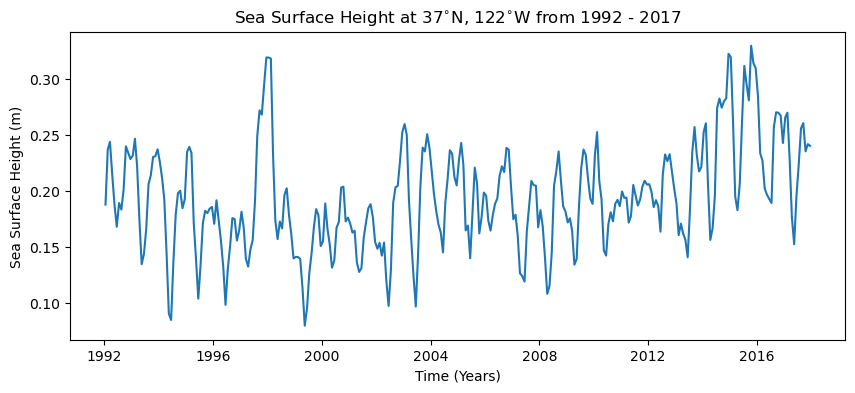

In [197]:
plt.figure(figsize=(10, 4))
plt.plot(ca_time_series[:, 0].astype("datetime64[ns]"), ca_time_series[:, 1])
plt.xlabel("Time (Years)")
plt.ylabel("Sea Surface Height (m)")
plt.title("Sea Surface Height at 37$^{\circ}$N, 122$^{\circ}$W from 1992 - 2017")
plt.show()

## Part 4: Create a Timeseries of Global Mean Sea Surface Height
Next, make a timeseries of sea surface height averaged across the globe. Your loop should look quite similar to that above - you'll just need to make a slight change to average across the whole ocean rather than sampling at a single point.

In [198]:
# create a timeseries of the global mean ssh by looping through all of the ssh files
# each time through the loop, take the mean of the ssh grid at the row and column identified above
# when you take the mean, be sure to exclude 0 values, which pertain to land
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second
global_time_series = np.zeros((len(sshdyn_file_list_sorted), 2))
global_time_series.shape

(312, 2)

In [199]:
# create a timeseries of ssh at the point above by looping through all of the ssh files
# each time through the loop, sample the ssh grid at the row and column identified above
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second
for i, file_path in enumerate(sshdyn_file_list_sorted):
    file_name = file_path.split("/")[-1]
    print(f"Opening {file_name} (file {i + 1} of {len(sshdyn_file_list_sorted)})")
    sshdyn_ds = xr.open_dataset(file_path)
    time = np.asarray(sshdyn_ds["time"][:])
    sshdyn = np.asarray(sshdyn_ds["SSHDYN"][:])
    sshdyn = sshdyn[sshdyn != 0]

    global_time_series[i, 0] = time[0]
    print(global_time_series[i, 0])

    # ('time', 'j', 'i')
    global_time_series[i, 1] = np.mean(sshdyn)
    print(global_time_series[i, 1])

    sshdyn_ds.close()

Opening SSHDYN_1992_01.nc (file 1 of 312)
6.955632e+17
-0.11573594685301769
Opening SSHDYN_1992_02.nc (file 2 of 312)
6.981552e+17
-0.12316853790612688
Opening SSHDYN_1992_03.nc (file 3 of 312)
7.007472e+17
-0.13171660865606852
Opening SSHDYN_1992_04.nc (file 4 of 312)
7.033824e+17
-0.12805938948653814
Opening SSHDYN_1992_05.nc (file 5 of 312)
7.060176e+17
-0.12207986726237971
Opening SSHDYN_1992_06.nc (file 6 of 312)
7.086528e+17
-0.11377358247642837
Opening SSHDYN_1992_07.nc (file 7 of 312)
7.11288e+17
-0.11346698292159489
Opening SSHDYN_1992_08.nc (file 8 of 312)
7.139664e+17
-0.10809699343572693
Opening SSHDYN_1992_09.nc (file 9 of 312)
7.166016e+17
-0.10512488762585466
Opening SSHDYN_1992_10.nc (file 10 of 312)
7.192368e+17
-0.10798407304581872
Opening SSHDYN_1992_11.nc (file 11 of 312)
7.21872e+17
-0.10449710792312923
Opening SSHDYN_1992_12.nc (file 12 of 312)
7.245072e+17
-0.10676119315739035
Opening SSHDYN_1993_01.nc (file 13 of 312)
7.271856e+17
-0.10504934129555499
Opening SS

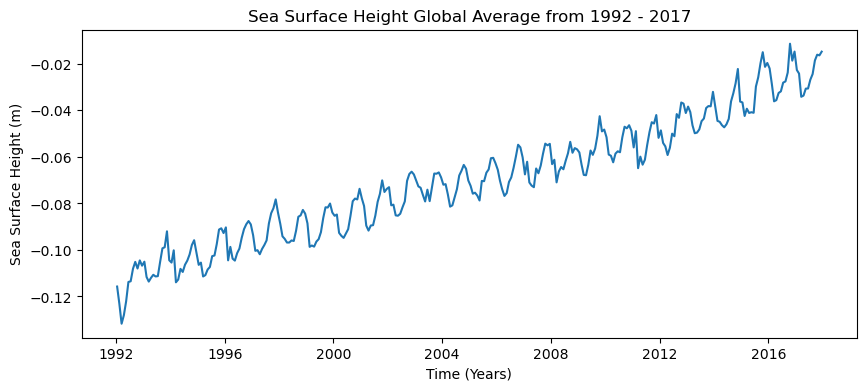

In [200]:
plt.figure(figsize=(10, 4))
plt.plot(global_time_series[:, 0].astype("datetime64[ns]"), global_time_series[:, 1])
plt.xlabel("Time (Years)")
plt.ylabel("Sea Surface Height (m)")
plt.title("Sea Surface Height Global Average from 1992 - 2017")
plt.show()

## Part 5: Compute Trends in Sea Surface Height
To compare the two timeseries, compute trends by fitting a line to each timeseries and examining the slope. Print out each trend in mm/yr, rounded to 2 decimal places. Note that the units of sea surface height are in meters.

In [201]:
# Define time array for months
months = np.arange(len(global_time_series))

# convert to "decimal years"
decimal_years = 1992 + (months / 12)

# compute the trends in SLR by fitting a line to the CA and the global mean timeseries
ca_line_coefficients = np.polyfit(decimal_years, ca_time_series[:, 1], 1)
global_line_coefficients = np.polyfit(decimal_years, global_time_series[:, 1], 1)

# y = mx + b
# [m, b]
print(ca_line_coefficients)
print(global_line_coefficients)

[ 2.07810589e-03 -3.97193825e+00]
[ 3.37681458e-03 -6.84047517e+00]


In [202]:
# print out the statistics in mm/yr for each timeseries
# m = rise / run
# rise / run = meters / months
# (meter / month) * (1000 mm / 1 m) = mm / month
# (mm / month) * ( 12 months / 1 year) = mm / year
ca_rate = ca_line_coefficients[0] * 1000 * 12
global_rate = global_line_coefficients[0] * 1000 * 12
global_ca_diff = global_rate - ca_rate

print(f"California's Dynamic Sea Surface Height Rate of Change: {ca_rate:.2f} mm/yr")
print(f"Globe's Dynamic Sea Surface Height Rate of Change: {global_rate:.2f} mm/yr")
print(f"Difference in rate: {global_ca_diff:.2f} mm/yr")

California's Dynamic Sea Surface Height Rate of Change: 24.94 mm/yr
Globe's Dynamic Sea Surface Height Rate of Change: 40.52 mm/yr
Difference in rate: 15.58 mm/yr


### Question:
How does the trend in sea level rise in California compare to the global mean rate?

Answer:

The trend for Global is 40.52 mm/yr and 24.94 mm/yr at a certain California coast location. The global rate is 15.58 mm/yr greater than the California rate

## Part 6: Plot the Timeseries of Sea Surface Height
Finally, plot the two timeseries on the same plot along with their trend lines. Be sure to label your axes and include a legend.

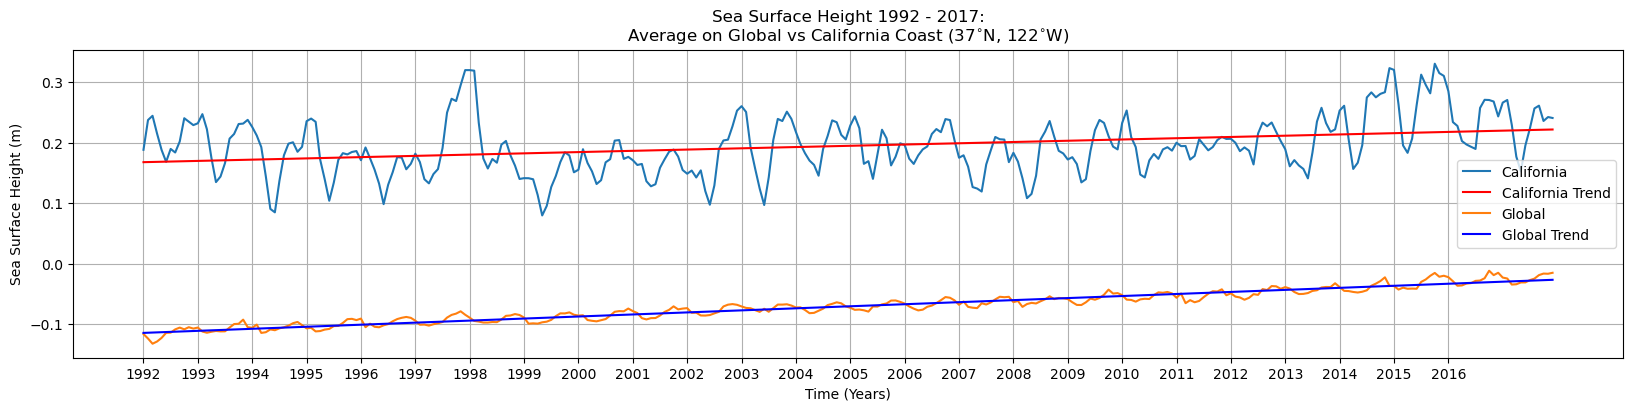

In [203]:
# Calculate trend lines
ca_m = ca_line_coefficients[0]
ca_b = ca_line_coefficients[1]
ca_y = ca_m * decimal_years + ca_b

global_m = global_line_coefficients[0]
global_b = global_line_coefficients[1]
global_y = global_m * decimal_years + global_b

# Plot Time Series & Trend Lines
plt.figure(figsize=(20, 4))

plt.plot(decimal_years, ca_time_series[:, 1], label="California")
plt.plot(decimal_years, ca_y, color="red", label="California Trend")

plt.plot(decimal_years, global_time_series[:, 1], label="Global")
plt.plot(decimal_years, global_y, color="blue", label="Global Trend")

plt.xlabel("Time (Years)")
plt.ylabel("Sea Surface Height (m)")
plt.title(
    "Sea Surface Height 1992 - 2017:\nAverage on Global vs California Coast (37$^{\circ}$N, 122$^{\circ}$W)"
)

# Add more x-axis ticks manually
ticks = np.arange(1992, 2017, 1)  # Generate ticks from -10 to 10 with a step of 1
plt.xticks(ticks)


plt.legend()

plt.grid(True)

plt.show()

### Questions:

How do the timeseries for Calfiornia and the global mean compare? Comment on their variability. What are the two highest years of sea level in California? What oceanographic phenomenon happened during this time?

Answer

The times series for California has more variance over time comparable to the global mean. California displays drastic sea surface height changes having height increase exceeding 0.3 m at 1998, right before and near the end of 2014.

On the other hand, the global average is observed to have more precision where the there are no drastic changes but more of a consistent gradual increase.

The oceanographic phenomenon that causes the increase of sea surface height is the El Niño event. This is a trend of climate in which the surface waters of the central and eastern Pacific Ocean warm. Sea level and coastal conditions are frequently significantly impacted by this warming's disruption of typical weather patterns.